<h4>READING DATASET</h4>

In [1]:
# importing pandas for reading the datasets
import pandas as pd

In [2]:
# reading the training dataset with a ';' delimiter
bdata=pd.read_csv('../input/mlworkshop/bank-full.csv',delimiter=';')

In [3]:
# displaying first 10 observations from the dataset
bdata.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
# describing the pandas dataframe bdata
bdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# getting details of no of attributes and observations
print('No of observations :',bdata.shape[0])
print('No of attributes :',bdata.shape[1])
print('No of numerical attributes :',bdata.describe().shape[1])
print('No of categorical attributes :',bdata.shape[1]-bdata.describe().shape[1])

No of observations : 45211
No of attributes : 17
No of numerical attributes : 7
No of categorical attributes : 10


In [6]:
# getting list of attributes
bdata.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

<h4>UNDERSTANDING FEATURES OF DATASET</h4>

__default__: has credit in default?

__housing__: has housing loan? 

__loan__: has personal loan?

__day__: last contact day of the week

__month__: last contact month of year 

__duration__: last contact duration, in seconds 

__campaign__: number of contacts performed during this campaign and for this client 

__pdays__: number of days that passed by after the client was last contacted from a previous campaign

__previous__: number of contacts performed before this campaign and for this client

__poutcome__: outcome of the previous marketing campaign

In [7]:
# importing matplotlib for plotting the graphs
import matplotlib.pyplot as plt

__Outcome variable__

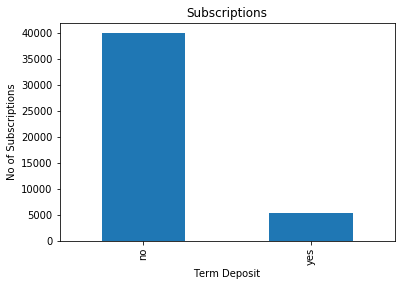

In [8]:
bdata['y'].value_counts().plot(kind='bar')
plt.title('Subscriptions')
plt.xlabel('Term Deposit')
plt.ylabel('No of Subscriptions')
plt.show()

We observe that the data is highly imbalanced, however we need a balanced data only for training.

Since the data preprocessing steps are same for both testing and training dataset, we first perform the data preprocessing and then divide the data into training data and testing data.

<h4>VISUALIZATION</h4>

__Job vs Subscription__

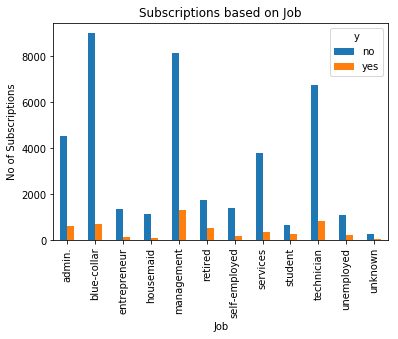

In [9]:
pd.crosstab(bdata.job,bdata.y).plot(kind='bar')
plt.title('Subscriptions based on Job')
plt.xlabel('Job')
plt.ylabel('No of Subscriptions')
plt.show()

__Marital Status vs Subscription__

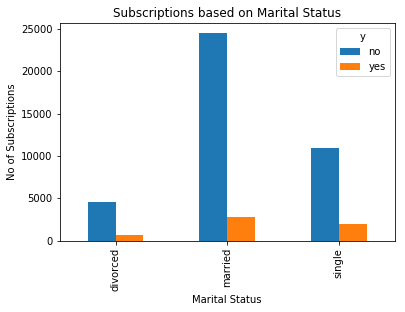

In [10]:
pd.crosstab(bdata.marital,bdata.y).plot(kind='bar')
plt.title('Subscriptions based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('No of Subscriptions')
plt.show()

__Education vs Subscription__

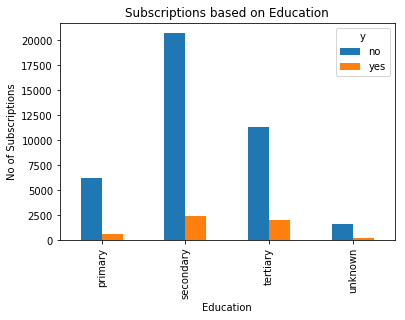

In [11]:
pd.crosstab(bdata.education,bdata.y).plot(kind='bar')
plt.title('Subscriptions based on Education')
plt.xlabel('Education')
plt.ylabel('No of Subscriptions')
plt.show()

__Housing Credit vs Subscription__

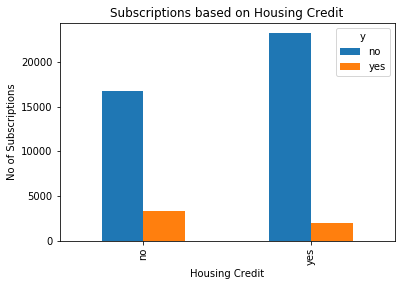

In [12]:
pd.crosstab(bdata.housing,bdata.y).plot(kind='bar')
plt.title('Subscriptions based on Housing Credit')
plt.xlabel('Housing Credit')
plt.ylabel('No of Subscriptions')
plt.show()

__Personal loan vs Subscription__

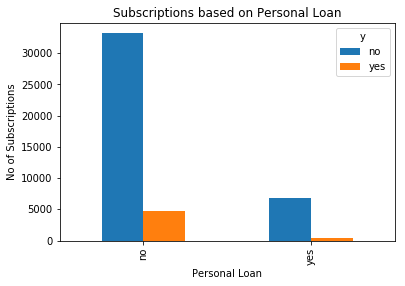

In [13]:
pd.crosstab(bdata.loan,bdata.y).plot(kind='bar')
plt.title('Subscriptions based on Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('No of Subscriptions')
plt.show()

__Outcome of Previous Campaign vs Subscription__

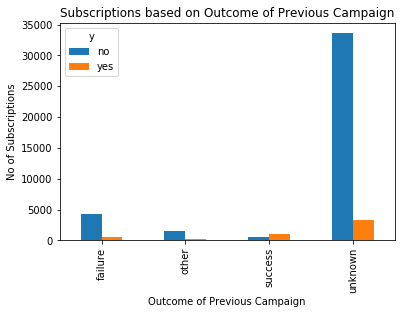

In [14]:
pd.crosstab(bdata.poutcome,bdata.y).plot(kind='bar')
plt.title('Subscriptions based on Outcome of Previous Campaign')
plt.xlabel('Outcome of Previous Campaign')
plt.ylabel('No of Subscriptions')
plt.show()

__Month vs Subscription__

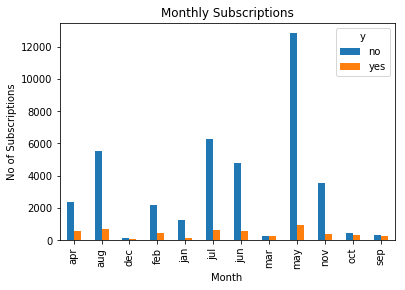

In [15]:
pd.crosstab(bdata.month,bdata.y).plot(kind='bar')
plt.title('Monthly Subscriptions')
plt.xlabel('Month')
plt.ylabel('No of Subscriptions')
plt.show()

<h4>DATA PREPROCESSING</h4>

In [16]:
# creating dummy variables for categorical variables

# creating a list of categorical variables to be transformed into dummy variables
category=['job','marital','education','default','housing','loan','contact',
          'month','poutcome']

# creating a backup
bdata_new = bdata

# creating dummy variables and joining it to the training set
for c in category:
    new_column = pd.get_dummies(bdata_new[c], prefix=c)
    bdata_dummy=bdata_new.join(new_column)
    bdata_new=bdata_dummy

In [17]:
bdata_new.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
5,35,management,married,tertiary,no,231,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,...,0,0,1,0,0,0,0,0,0,1
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
8,58,retired,married,primary,no,121,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
9,43,technician,single,secondary,no,593,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [18]:
# see the dummy setup of one categorical variable
bdata_new[[col for col in bdata_new if col.startswith('education')]].head(10)

,education,education_primary,education_secondary,education_tertiary,education_unknown
0,tertiary,0,0,1,0
1,secondary,0,1,0,0
2,secondary,0,1,0,0
3,unknown,0,0,0,1
4,unknown,0,0,0,1
5,tertiary,0,0,1,0
6,tertiary,0,0,1,0
7,tertiary,0,0,1,0
8,primary,1,0,0,0
9,secondary,0,1,0,0


In [19]:
# drop the initial categorical variable
bdata_final=bdata_new.drop(category,axis=1)

In [20]:
bdata_final.head(10)

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
5,35,231,5,139,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
6,28,447,5,217,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
7,42,2,5,380,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
8,58,121,5,50,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
9,43,593,5,55,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [21]:
# coding no as '0' and yes as '1'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(bdata_final['y'])
bdata_final['y'] = labels

In [22]:
bdata_final.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [23]:
bdata_final.head(10)

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,42,2,5,380,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,58,121,5,50,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,43,593,5,55,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [24]:
# feature selection to reduce dimensionality
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# creating dataframe of features
X=bdata_final.drop(['y'],axis=1)
# creating dataframe of output variable
y=bdata_final['y']

# standard scaling
X_norm = MinMaxScaler().fit_transform(X)

rfe_selector = RFE(estimator=LogisticRegression(solver='liblinear',max_iter=100,multi_class='ovr',n_jobs=1), n_features_to_select=30, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 51 features.
Fitting estimator with 41 features.
Fitting estimator with 31 features.
30 selected features


In [25]:
rfe_feature

['balance',
 'day',
 'duration',
 'campaign',
 'previous',
 'job_entrepreneur',
 'job_housemaid',
 'job_retired',
 'job_student',
 'marital_married',
 'education_primary',
 'default_no',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

<p>features to be eliminated : age, pdays (30 selected features)</p>
<p>features that may be eliminated : job, marital, education, loan (20 selected features)</p>

In [26]:
# dropping age and pdays
bdata_final=bdata_final.drop(['age','pdays'],axis=1)

In [27]:
bdata_final.head(10)

,balance,day,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2143,5,261,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,29,5,151,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2,5,76,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1506,5,92,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,5,198,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,231,5,139,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,447,5,217,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,2,5,380,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8,121,5,50,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,593,5,55,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [28]:
cat=[col for col in bdata_final if col.startswith('job')]
mar_cat=[col for col in bdata_final if col.startswith('marital')]
edu_cat=[col for col in bdata_final if col.startswith('education')]
loan_cat=[col for col in bdata_final if col.startswith('loan')]
cat.extend(mar_cat)
cat.extend(edu_cat)
cat.extend(loan_cat)

In [29]:
cat

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'loan_no',
 'loan_yes']

In [30]:
# creating a dataframe with lesser dimension
bdata_dr=bdata_final.drop(cat,axis=1)

In [31]:
bdata_dr.head(10)

,balance,day,duration,campaign,previous,y,default_no,default_yes,housing_no,housing_yes,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2143,5,261,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,29,5,151,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,2,5,76,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1506,5,92,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,1,5,198,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
5,231,5,139,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
6,447,5,217,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
7,2,5,380,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
8,121,5,50,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
9,593,5,55,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


<h4>TRAIN TEST SPLIT</h4>

In [32]:
# importing sklearn for train test split
from sklearn.model_selection import train_test_split

In [33]:
# creating training set of features
X=bdata_final.drop(['y'],axis=1)
# creating training set of output variable
y=pd.DataFrame(bdata_final['y'])

In [34]:
# splitting the dataset into train and test for both input and output variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [35]:
X_train.head(10)

,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
15316,726,18,199,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
22239,-18,21,870,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4955,622,21,145,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10645,0,16,599,3,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
33458,1,20,257,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31342,1981,16,291,3,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
36801,663,12,409,1,6,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
20491,27,12,256,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11740,396,20,716,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
37523,4976,13,36,9,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [36]:
y_train.head(10)

,y
15316,0
22239,0
4955,0
10645,0
33458,0
31342,0
36801,1
20491,0
11740,1
37523,0


In [37]:
X_test.head(10)

,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
26995,4642,21,528,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
9689,425,6,147,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
40254,2081,15,147,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4170,259,19,287,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
20402,636,12,91,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31307,685,10,230,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
39553,753,26,71,5,4,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
8281,180,2,392,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
39175,-1730,18,178,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
42966,935,9,385,2,8,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [38]:
y_test.head(10)

,y
26995,1
9689,0
40254,0
4170,0
20402,0
31307,0
39553,0
8281,0
39175,0
42966,1


<h4>STANDARDIZING TRAINING AND TESTING SET</h4>

In [39]:
# importing the Standard Scaler from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [40]:
X_train

array([[-0.20640566,  0.26208599, -0.22999481, ..., -0.20542811,
        -0.18388041,  0.47284823],
       [-0.44586337,  0.62331402,  2.38155505, ..., -0.20542811,
        -0.18388041,  0.47284823],
       [-0.23987824,  0.62331402, -0.44016424, ..., -0.20542811,
        -0.18388041,  0.47284823],
       ...,
       [ 0.58534965, -0.82159811, -0.59973733, ..., -0.20542811,
        -0.18388041,  0.47284823],
       [-0.41432189,  0.38249533, -0.24167089, ..., -0.20542811,
        -0.18388041,  0.47284823],
       [-0.44007003, -1.54405417, -0.28448318, ..., -0.20542811,
        -0.18388041,  0.47284823]])

In [41]:
X_test

array([[ 1.0539658 ,  0.62331402,  1.05048195, ..., -0.20542811,
        -0.18388041,  0.47284823],
       [-0.30328304, -1.18282614, -0.43238019, ..., -0.20542811,
        -0.18388041,  0.47284823],
       [ 0.22970346, -0.09914205, -0.43238019, ..., -0.20542811,
        -0.18388041,  0.47284823],
       ...,
       [-0.42848337, -0.33996073, -0.76709448, ..., -0.20542811,
        -0.18388041, -2.11484348],
       [-0.43813892, -1.30323549, -0.52578883, ..., -0.20542811,
        -0.18388041,  0.47284823],
       [-0.5256826 , -0.70118877, -0.37399979, ..., -0.20542811,
        -0.18388041,  0.47284823]])

In [42]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

**BALANCING THE DATASET**

In [44]:
# importing imblearn for Synthetic Minority Over Sampling Technique
# NOTE : SMOTE technique needs the dataset to be numpy array

# from imblearn.over_sampling import SMOTE
# sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=0)
# X_res, y_res = sm.fit_resample(X_train, y_train)
# import numpy as np
# np.savetxt('xres.txt', X_res, fmt='%f')
# np.savetxt('yres.txt', y_res, fmt='%d')

# SMOTE applied dataset
import numpy as np
X_res = np.loadtxt('../input/smotedata/xres.txt', dtype=float)
y_res = np.loadtxt('../input/smotedata/yres.txt', dtype=int)

In [45]:
print('No 0f 0 case :',y_res[y_res==0].shape[0])
print('No of 1 case :',y_res[y_res==1].shape[0])

No 0f 0 case : 29968
No of 1 case : 29968


<h4>FITTING MODEL</h4>

__Random Forest Classifier__

In [46]:
from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
modelrf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [47]:
# Fit on training data
modelrf.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
# predicting the testing set results
y_pred = modelrf.predict(X_test)
y_pred = (y_pred > 0.50)

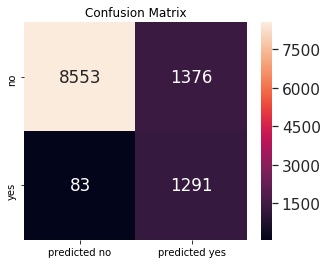

Test Data Accuracy: 0.9005


In [49]:
# importing confusion matrix and roc_auc_score from sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# importing seaborn for plotting the heatmap
import seaborn as sn

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = ('no', 'yes'), columns = ('predicted no',
                                                           'predicted yes'))
plt.figure(figsize = (5,4))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
plt.show()
print("Test Data Accuracy: %0.4f" % roc_auc_score(y_test, y_pred))

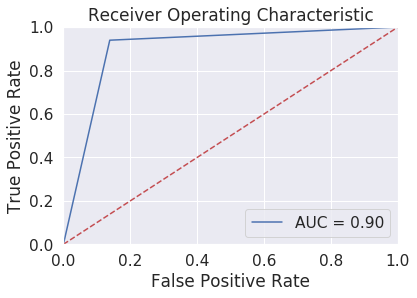

In [50]:
# importing roc curve and metrics from sklearn
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Support Vector Classifier**

In [51]:
from sklearn.svm import LinearSVC
modelsv = LinearSVC(max_iter=100,random_state=0)

In [52]:
modelsv.fit(X_res, y_res)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [53]:
# predicting the testing set results
y_pred = modelsv.predict(X_test)
y_pred = (y_pred > 0.50)

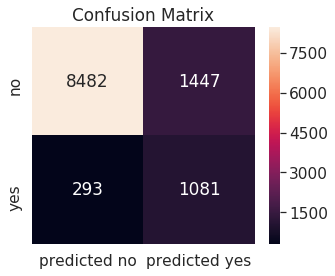

Test Data Accuracy: 0.8205


In [54]:
# importing confusion matrix and roc_auc_score from sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# importing seaborn for plotting the heatmap
import seaborn as sn

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = ('no', 'yes'), columns = ('predicted no',
                                                           'predicted yes'))
plt.figure(figsize = (5,4))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
plt.show()
print("Test Data Accuracy: %0.4f" % roc_auc_score(y_test, y_pred))

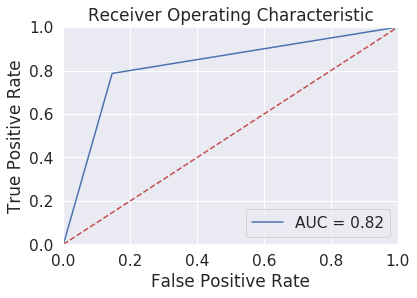

In [55]:
# importing roc curve and metrics from sklearn
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**K-Nearest Neighbour Classifier**

In [56]:
from sklearn.neighbors import KNeighborsClassifier
modelkn = KNeighborsClassifier(n_neighbors=3)

In [57]:
modelkn.fit(X_res, y_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [58]:
# predicting the testing set results
y_pred = modelkn.predict(X_test)
y_pred = (y_pred > 0.50)

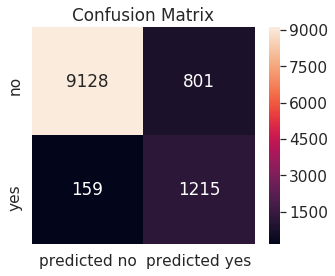

Test Data Accuracy: 0.9018


In [59]:
# importing confusion matrix and roc_auc_score from sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# importing seaborn for plotting the heatmap
import seaborn as sn

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = ('no', 'yes'), columns = ('predicted no',
                                                           'predicted yes'))
plt.figure(figsize = (5,4))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
plt.show()
print("Test Data Accuracy: %0.4f" % roc_auc_score(y_test, y_pred))

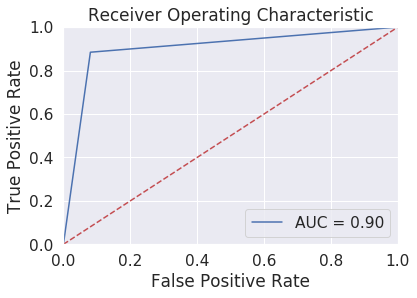

In [60]:
# importing roc curve and metrics from sklearn
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Logistic Regression**

In [61]:
from sklearn.linear_model import LogisticRegression
modellr = LogisticRegression()

In [62]:
modellr.fit(X_res, y_res)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# predicting the testing set results
y_pred = modellr.predict(X_test)
y_pred = (y_pred > 0.50)

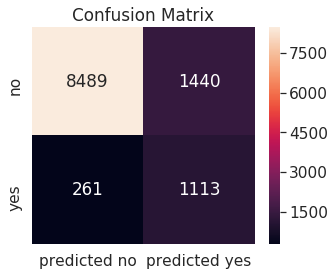

Test Data Accuracy: 0.8325


In [64]:
# importing confusion matrix and roc_auc_score from sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# importing seaborn for plotting the heatmap
import seaborn as sn

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = ('no', 'yes'), columns = ('predicted no',
                                                           'predicted yes'))
plt.figure(figsize = (5,4))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
plt.show()
print("Test Data Accuracy: %0.4f" % roc_auc_score(y_test, y_pred))

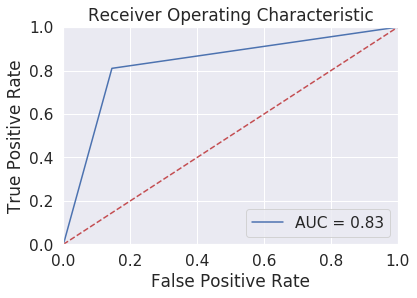

In [65]:
# importing roc curve and metrics from sklearn
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Naive Bayes Classifier**

In [66]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()

In [67]:
modelnb.fit(X_res, y_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
# predicting the testing set results
y_pred = modelnb.predict(X_test)
y_pred = (y_pred > 0.50)

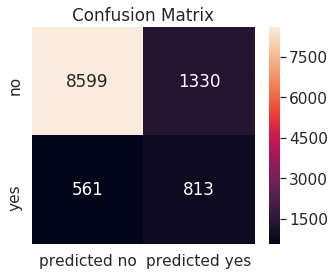

Test Data Accuracy: 0.7289


In [69]:
# importing confusion matrix and roc_auc_score from sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# importing seaborn for plotting the heatmap
import seaborn as sn

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = ('no', 'yes'), columns = ('predicted no',
                                                           'predicted yes'))
plt.figure(figsize = (5,4))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
plt.show()
print("Test Data Accuracy: %0.4f" % roc_auc_score(y_test, y_pred))

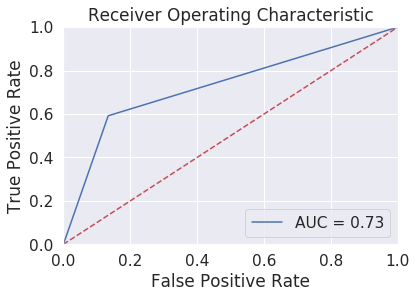

In [70]:
# importing roc curve and metrics from sklearn
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()